<a href="https://colab.research.google.com/github/yh08037/KNU-DeepLearning/blob/master/Day2_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification

In [0]:
import tensorflow as tf
import numpy as np


# define data / output
iris = datasets.load_iris()
btgt = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

#

# Tensor Declaration

In [5]:
import tensorflow as tf
import numpy as np

sess = tf.Session()

row_dim = 2
col_dim = 3
zero_tsr = tf.zeros([row_dim, col_dim])
ones_tsr = tf.ones([row_dim, col_dim])
filled_tsr = tf.fill([row_dim, col_dim], 42)
constant_tsr = tf.constant([1, 2, 3])
print(zero_tsr, '\n', ones_tsr, '\n', constant_tsr, '\n')
print(sess.run(zero_tsr), '\n\n', sess.run(ones_tsr), '\n\n', sess.run(filled_tsr), '\n\n', sess.run(constant_tsr))

linear_tsr = tf.linspace(start=0., stop=1., num=5)
int_seq_tsr = tf.range(start=0, limit=10, delta=2)
print(linear_tsr)
print(int_seq_tsr)
print(sess.run(linear_tsr))
print(sess.run(int_seq_tsr))

randunif_tsr = tf.random_uniform([row_dim, col_dim], minval=0, maxval=1)
print(randunif_tsr) 
print(sess.run(randunif_tsr))

randnorm_tsr = tf.random_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
print(randnorm_tsr)
print(sess.run(randnorm_tsr))

truncnorm_tsr =tf.truncated_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
print(truncnorm_tsr)
print(sess.run(truncnorm_tsr))

Tensor("zeros_3:0", shape=(2, 3), dtype=float32) 
 Tensor("ones_2:0", shape=(2, 3), dtype=float32) 
 Tensor("Const_2:0", shape=(3,), dtype=int32) 

[[0. 0. 0.]
 [0. 0. 0.]] 

 [[1. 1. 1.]
 [1. 1. 1.]] 

 [[42 42 42]
 [42 42 42]] 

 [1 2 3]
Tensor("LinSpace_1:0", shape=(5,), dtype=float32)
Tensor("range_1:0", shape=(5,), dtype=int32)
[0.   0.25 0.5  0.75 1.  ]
[0 2 4 6 8]
Tensor("random_uniform_1:0", shape=(2, 3), dtype=float32)
[[0.34326506 0.5087148  0.40556657]
 [0.11562657 0.25181007 0.36291468]]
Tensor("random_normal_1:0", shape=(2, 3), dtype=float32)
[[ 0.0188682  -0.64926577 -0.780249  ]
 [-0.1961752  -1.2150136  -0.79979074]]
Tensor("truncated_normal:0", shape=(2, 3), dtype=float32)
[[-1.2745099   1.1561878   0.08467864]
 [-0.12166663 -1.8927246   0.74318963]]


# Variables
* 텐서플로우가 알고리즘을 최적화하기 위해 어떻게 이들을 변화시키는지 계속 추적할 수 있게하는 알고리즘의 매개변수

## Variables from tensors

* 주로 인공신경망의 가중치와 같은  학습가능한 매개변수들
* 텐서를 감싸므로써 대응하는 변수를 생성한다

In [25]:
my_var = tf.Variable(tf.zeros([row_dim, col_dim]))
print(my_var)

<tf.Variable 'Variable_2:0' shape=(2, 3) dtype=float32_ref>



## Variables from numpy arrays, or constant (검토 필요)

* 메소드 기본형 : convert_to_tenser(value, dtype=None, name=None, preferred_type=None)

In [24]:
print(tf.convert_to_tensor(tf.constant([[1.0, 2.0], [3.0, 4.0]])))
print(tf.convert_to_tensor([[1.0, 2.0], [3.0, 4.0]]))
print(tf.convert_to_tensor(np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32)))

Tensor("Const_18:0", shape=(2, 2), dtype=float32)
Tensor("Const_19:0", shape=(2, 2), dtype=float32)
Tensor("Const_20:0", shape=(2, 2), dtype=float32)


## Variables intialization methods

* 가장 대표적인 방법은 global_variables_initializer() 메소드인데, 이는 그래프 안에서 우리가 만든 모든 변수를 초기화시키는 연산을 생성한다

* 또는 한 변수를 다른 변수를 초기화한 결과를 기반으로 초기화하려면 다음과 같이 할 수 있다

In [0]:
sess = tf.Session()
first_var = tf.Variables(tf.zeros([2, 3]))
sess.run(first_var.initializer)
second_var = tf.Variable(tf.zeros_like(first_var))  # first_var 에 의존
sess.run(second_var.initializer)

# Placeholders
* 특정한 타입이나 모양의 데이터를 feed in 할 수 있게 해주는 객체
* 연산의 예상된 결과와 같은 computational graph의 결과에 의존
* 그저 그래프안에 feed in 되기 위한 자리만을 잡고 있음
* 세션에서 feed_dict 인자를 통하여 데이터를 얻는다


In [31]:
sess = tf.Session()
x = tf.placeholder(tf.float32, shape=[2, 2])
y = tf.identity(x)

x_vals = np.random.rand(2, 2)
sess.run(y, feed_dict={x:x_vals})          # 데이터를 feed 만 한다
temp = sess.run(y, feed_dict={x:x_vals})   # 데이터를 feed 하고 temp 에 그 값을 저장한다

print(x_vals)
print(temp)


[[0.53452392 0.16960416]
 [0.89727193 0.99758985]]
[[0.5345239  0.16960415]
 [0.89727193 0.9975898 ]]


# Implementing Activation Function

* 텐서플로우의 뉴럴 네트워크 라이브러리 (nn) 안에 포함되어있음
* 미리 정의된 activation function 을 import 하여 사용 


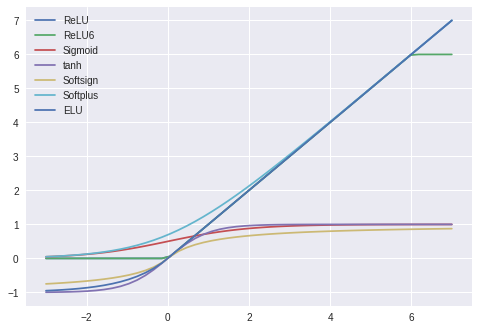

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt


sess = tf.Session()

x = tf.linspace(start=-3., stop=7., num=50)

# ReLU (rectified linear unit) : max(0, x)
plt.plot(sess.run(x), sess.run(tf.nn.relu(x)), label='ReLU')

# ReLU6 : min(max(0, x), 6)
plt.plot(sess.run(x), sess.run(tf.nn.relu6(x)), label='ReLU6')

# Sigmoid function : -1(1+exp(-x))
plt.plot(sess.run(x), sess.run(tf.nn.sigmoid(x)), label='Sigmoid')

# Hyper tangent : ((exp(x)-exp(-x))/(exp(x)+exp(-x))
plt.plot(sess.run(x), sess.run(tf.nn.tanh(x)), label='tanh')

# Softsign : x/(abs(x)+1)
plt.plot(sess.run(x), sess.run(tf.nn.softsign(x)), label='Softsign')

# Softplus : log(exp(x)+1
plt.plot(sess.run(x), sess.run(tf.nn.softplus(x)), label='Softplus')

# Esponential Linear Unit (ELU) : (exp(x)+1) if x < 0 else x
plt.plot(sess.run(x), sess.run(tf.nn.elu(x)), label='ELU')

plt.legend()
